In [1]:
import tensorflow as tf

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

## try convolving kernels with images

In [59]:
image_path = 'stanford-tensorflow-tutorials-master/data/friday.jpg'

In [3]:
import numpy as np

a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 0.25
a[0, 1, :, :] = 0.125
a[1, 0, :, :] = 0.125
a[2, 1, :, :] = 0.125
a[1, 2, :, :] = 0.125
a[0, 0, :, :] = 0.0625
a[0, 2, :, :] = 0.0625
a[2, 0, :, :] = 0.0625
a[2, 2, :, :] = 0.0625

BLUR_FILTER_RGB = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 1, 1])
# a[1, 1, :, :] = 0.25
# a[0, 1, :, :] = 0.125
# a[1, 0, :, :] = 0.125
# a[2, 1, :, :] = 0.125
# a[1, 2, :, :] = 0.125
# a[0, 0, :, :] = 0.0625
# a[0, 2, :, :] = 0.0625
# a[2, 0, :, :] = 0.0625
# a[2, 2, :, :] = 0.0625
a[1, 1, :, :] = 1.0
a[0, 1, :, :] = 1.0
a[1, 0, :, :] = 1.0
a[2, 1, :, :] = 1.0
a[1, 2, :, :] = 1.0
a[0, 0, :, :] = 1.0
a[0, 2, :, :] = 1.0
a[2, 0, :, :] = 1.0
a[2, 2, :, :] = 1.0
BLUR_FILTER = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1

SHARPEN_FILTER_RGB = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1

SHARPEN_FILTER = tf.constant(a, dtype=tf.float32)

# a = np.zeros([3, 3, 3, 3])
# a[:, :, :, :] = -1
# a[1, 1, :, :] = 8

# EDGE_FILTER_RGB = tf.constant(a, dtype=tf.float32)

EDGE_FILTER_RGB = tf.constant([
			[[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
            [[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]],
            [[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ 8., 0., 0.], [ 0., 8., 0.], [ 0., 0., 8.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]],
			[[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]],
			[[ -1., 0., 0.], [ 0., -1., 0.], [ 0., 0., -1.]]]
])

a = np.zeros([3, 3, 1, 1])
# a[:, :, :, :] = -1
# a[1, 1, :, :] = 8
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[1, 2, :, :] = -1
a[2, 1, :, :] = -1
a[1, 1, :, :] = 4

EDGE_FILTER = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 3, 3])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2 # originally 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2

TOP_SOBEL_RGB = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 1, 1])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2 # originally 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2

TOP_SOBEL = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 3, 3])
a[0, 0, :, :] = -2
a[0, 1, :, :] = -1 
a[1, 0, :, :] = -1
a[1, 1, :, :] = 1
a[1, 2, :, :] = 1
a[2, 1, :, :] = 1
a[2, 2, :, :] = 2

EMBOSS_FILTER_RGB = tf.constant(a, dtype=tf.float32)

a = np.zeros([3, 3, 1, 1])
a[0, 0, :, :] = -2
a[0, 1, :, :] = -1 
a[1, 0, :, :] = -1
a[1, 1, :, :] = 1
a[1, 2, :, :] = 1
a[2, 1, :, :] = 1
a[2, 2, :, :] = 2
EMBOSS_FILTER = tf.constant(a, dtype=tf.float32)

In [4]:
from PIL import Image

In [60]:
im = Image.open(image_path)

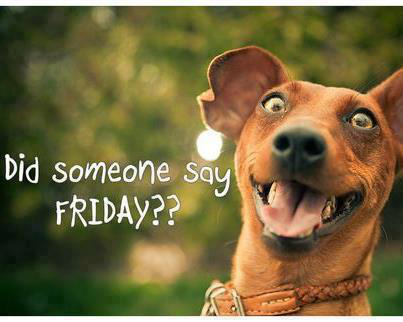

In [92]:
im

In [56]:
def get_real_images(images):
    with tf.Session() as sess:
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        images = sess.run(images)
        coord.request_stop()
        coord.join(threads)
    return images

In [87]:
?tf.expand_dims

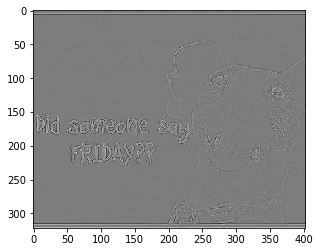

In [108]:
# img = im.convert("L")
# img = np.array(img)
# img = tf.constant(img, tf.float32)
img = np.array(im)
con = tf.constant(img, tf.float32)
img = tf.image.rgb_to_grayscale([con])[0]
blur_images = tf.nn.conv2d([img], EDGE_FILTER, [1,1,1,1], 'SAME')
images = get_real_images(blur_images)
img_2 = images[0]
sh = img_2.shape
plt.imshow(img_2.reshape(sh[0], sh[1]), cmap='gray')

# COURSE SOLUTION

In [88]:
"""
Simple examples of convolution to do some basic filters
Also demonstrates the use of TensorFlow data readers.

We will use some popular filters for our image.
It seems to be working with grayscale images, but not with rgb images.
It's probably because I didn't choose the right kernels for rgb images.

kernels for rgb images have dimensions 3 x 3 x 3 x 3
kernels for grayscale images have dimensions 3 x 3 x 1 x 1

Note:
When you call tf.train.string_input_producer,
a tf.train.QueueRunner is added to the graph, which must be run using
e.g. tf.train.start_queue_runners() else your session will run into deadlock
and your program will crash.

And to run QueueRunner, you need a coordinator to close to your queue for you.
Without coordinator, your threads will keep on running outside session and you will have the error:
ERROR:tensorflow:Exception in QueueRunner: Attempted to use a closed Session.

Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu

"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


from matplotlib import gridspec as gridspec
from matplotlib import pyplot as plt
import tensorflow as tf

FILENAME = 'stanford-tensorflow-tutorials-master/data/friday.jpg'

def read_one_image(filename):
    """ This is just to demonstrate how to open an image in TensorFlow,
    but it's actually a lot easier to use Pillow 
    """
    filename_queue = tf.train.string_input_producer([filename])
    image_reader = tf.WholeFileReader()
    _, image_file = image_reader.read(filename_queue)
    image = tf.image.decode_jpeg(image_file, channels=3)
    image = tf.cast(image, tf.float32) / 256.0 # cast to float to make conv2d work
    return image

def convolve(image, kernels, rgb=True, strides=[1, 3, 3, 1], padding='SAME'):
    images = [image[0]]
    for i, kernel in enumerate(kernels):
        filtered_image = tf.nn.conv2d(image, kernel, strides=strides, padding=padding)[0]
        if i == 2:
            filtered_image = tf.minimum(tf.nn.relu(filtered_image), 255)
        images.append(filtered_image)
    return images

def get_real_images(images):
    with tf.Session() as sess:
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        images = sess.run(images)
        coord.request_stop()
        coord.join(threads)
    return images

def show_images(images, rgb=True):
    gs = gridspec.GridSpec(1, len(images))
    for i, image in enumerate(images):
        plt.subplot(gs[0, i])
        if rgb:
            plt.imshow(image)
        else: 
            image = image.reshape(image.shape[0], image.shape[1])
            plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

def main():
    rgb = False
    if rgb:
        kernels_list = [BLUR_FILTER_RGB, SHARPEN_FILTER_RGB, EDGE_FILTER_RGB, 
                    TOP_SOBEL_RGB, EMBOSS_FILTER_RGB]
    else:
        kernels_list = [BLUR_FILTER, SHARPEN_FILTER, EDGE_FILTER, 
                    TOP_SOBEL, EMBOSS_FILTER]

    image = read_one_image(FILENAME)
    if not rgb:
        image = tf.image.rgb_to_grayscale(image)
    image = tf.expand_dims(image, 0) # to make it into a batch of 1 element
    images = convolve(image, kernels_list, rgb)
    images = get_real_images(images)
    show_images(images, rgb)


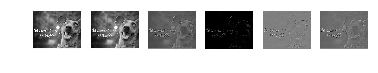

In [89]:
main()

# build convolution neural network to work on mnist dataset

In [111]:
from tensorflow.examples.tutorials.mnist import input_data

In [112]:
mnist = input_data.read_data_sets("stanford-tensorflow-tutorials-master/data/mnist", one_hot=True)

Extracting stanford-tensorflow-tutorials-master/data/mnist/train-images-idx3-ubyte.gz
Extracting stanford-tensorflow-tutorials-master/data/mnist/train-labels-idx1-ubyte.gz
Extracting stanford-tensorflow-tutorials-master/data/mnist/t10k-images-idx3-ubyte.gz
Extracting stanford-tensorflow-tutorials-master/data/mnist/t10k-labels-idx1-ubyte.gz


In [113]:
mnist.train.num_examples

55000

In [115]:
mnist.train.labels.shape

(55000, 10)

In [116]:
mnist.train.images.shape

(55000, 784)

In [117]:
mnist.train.images[0].shape

(784,)

In [121]:
import time

## implement cnn using starter code from the course

#### n_epochs = 1, learning_rate = 0.001, drop_out = 0.75, adam_optimizer -> accuracy = 0.9218 

In [125]:
tf.reset_default_graph()

N_CLASSES = 10

# Step 2: Define paramaters for the model
LEARNING_RATE = 0.001
BATCH_SIZE = 128
SKIP_STEP = 10
DROPOUT = 0.75
N_EPOCHS = 1

# Step 3: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# We'll be doing dropout for hidden layer so we'll need a placeholder
# for the dropout probability too
# Use None for shape so we can change the batch_size once we've built the graph
with tf.name_scope('data'):
    X = tf.placeholder(tf.float32, [None, 784], name="X_placeholder")
    Y = tf.placeholder(tf.float32, [None, 10], name="Y_placeholder")

dropout = tf.placeholder(tf.float32, name='dropout')

# Step 4 + 5: create weights + do inference
# the model is conv -> relu -> pool -> conv -> relu -> pool -> fully connected -> softmax

global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

# utils.make_dir('checkpoints')
# utils.make_dir('checkpoints/convnet_mnist')

with tf.variable_scope('conv1') as scope:
    # first, reshape the image to [BATCH_SIZE, 28, 28, 1] to make it work with tf.nn.conv2d
    # use the dynamic dimension -1
    images = tf.reshape(X, shape=[-1, 28, 28, 1])
    
    # TO DO

    # create kernel variable of dimension [5, 5, 1, 32]
    # use tf.truncated_normal_initializer()
    
    kernel = tf.get_variable('kernel', shape=[5, 5, 1, 32], initializer=tf.truncated_normal_initializer())
    
    # TO DO

    # create biases variable of dimension [32]
    # use tf.constant_initializer(0.0)
    
    biases = tf.get_variable('biases', shape=[32], initializer=tf.constant_initializer(0.0))
    
    # TO DO 

    # apply tf.nn.conv2d. strides [1, 1, 1, 1], padding is 'SAME'
    
    conv = tf.nn.conv2d(images, kernel, strides=[1, 1, 1, 1], padding='SAME')
    
    # TO DO

    # apply relu on the sum of convolution output and biases
    
    conv1 = tf.nn.relu(conv + biases, name='conv1')
    
    # TO DO 

    # output is of dimension BATCH_SIZE x 28 x 28 x 32

    
with tf.variable_scope('pool1') as scope:
    # apply max pool with ksize [1, 2, 2, 1], and strides [1, 2, 2, 1], padding 'SAME'
    
    # TO DO
    
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], name='pool1', strides=[1, 2, 2, 1], padding='SAME')

    # output is of dimension BATCH_SIZE x 14 x 14 x 32
    

with tf.variable_scope('conv2') as scope:
    # similar to conv1, except kernel now is of the size 5 x 5 x 32 x 64
    kernel = tf.get_variable('kernels', [5, 5, 32, 64], 
                        initializer=tf.truncated_normal_initializer())
    biases = tf.get_variable('biases', [64],
                        initializer=tf.random_normal_initializer())
    conv = tf.nn.conv2d(pool1, kernel, strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.relu(conv + biases, name=scope.name)

    # output is of dimension BATCH_SIZE x 14 x 14 x 64

with tf.variable_scope('pool2') as scope:
    # similar to pool1
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                            padding='SAME')

    # output is of dimension BATCH_SIZE x 7 x 7 x 64

with tf.variable_scope('fc') as scope:
    # use weight of dimension 7 * 7 * 64 x 1024
    input_features = 7 * 7 * 64
    
    # create weights and biases

    # TO DO
    w = tf.get_variable('weights', shape=[input_features, 1024], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('bias', shape=[1024], initializer=tf.constant_initializer(0.0))

    # reshape pool2 to 2 dimensional
    pool2 = tf.reshape(pool2, [-1, input_features])

    # apply relu on matmul of pool2 and w + b
    fc = tf.nn.relu(tf.matmul(pool2, w) + b, name='relu')
    
    # TO DO

    # apply dropout
    fc = tf.nn.dropout(fc, dropout, name='relu_dropout')

with tf.variable_scope('softmax_linear') as scope:
    # this you should know. get logits without softmax
    # you need to create weights and biases

    # TO DO
    
    w = tf.get_variable('weights', shape=[1024, N_CLASSES], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('bias', shape=[N_CLASSES], initializer=tf.constant_initializer(0.0))
    
    logits = tf.matmul(fc, w) + b

# Step 6: define loss function
# use softmax cross entropy with logits as the loss function
# compute mean cross entropy, softmax is applied internally
with tf.name_scope('loss'):
    # you should know how to do this too
    
    # TO DO
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits), name='loss')

# Step 7: define training op
# using gradient descent with learning rate of LEARNING_RATE to minimize cost
# don't forgot to pass in global_step

# TO DO

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss, global_step=global_step)

with tf.name_scope('summary'):
    tf.summary.scalar('loss', loss)
    summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    # to visualize using TensorBoard
    writer = tf.summary.FileWriter('./my_graph/mnist', sess.graph)
    ##### You have to create folders to store checkpoints
#     ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/convnet_mnist/checkpoint'))
#     # if that checkpoint exists, restore from checkpoint
#     if ckpt and ckpt.model_checkpoint_path:
#         saver.restore(sess, ckpt.model_checkpoint_path)
    
    initial_step = global_step.eval()

    start_time = time.time()
    n_batches = int(mnist.train.num_examples / BATCH_SIZE)

    total_loss = 0.0
    for index in range(initial_step, n_batches * N_EPOCHS): # train the model n_epochs times
        X_batch, Y_batch = mnist.train.next_batch(BATCH_SIZE)
        _, loss_batch, summary = sess.run([optimizer, loss, summary_op], 
                                feed_dict={X: X_batch, Y:Y_batch, dropout: DROPOUT}) 
        total_loss += loss_batch
        writer.add_summary(summary, global_step=index)
        if (index + 1) % SKIP_STEP == 0:
            print('Average loss at step {}: {:5.1f}'.format(index + 1, total_loss / SKIP_STEP))
            total_loss = 0.0
            saver.save(sess, 'checkpoints/convnet_mnist/mnist-convnet', index)
    
    print("Optimization Finished!") # should be around 0.35 after 25 epochs
    print("Total time: {0} seconds".format(time.time() - start_time))
    
    # test the model
    n_batches = int(mnist.test.num_examples/BATCH_SIZE)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(BATCH_SIZE)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], 
                                        feed_dict={X: X_batch, Y:Y_batch, dropout: DROPOUT}) 
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        total_correct_preds += sess.run(accuracy)   
    
    print("Accuracy {0}".format(total_correct_preds/mnist.test.num_examples))

Average loss at step 10: 29686.0
Average loss at step 20: 15656.0
Average loss at step 30: 9511.3
Average loss at step 40: 6560.7
Average loss at step 50: 5175.8
Average loss at step 60: 4126.0
Average loss at step 70: 3318.1
Average loss at step 80: 3043.9
Average loss at step 90: 2674.8
Average loss at step 100: 2411.2
Average loss at step 110: 1978.0
Average loss at step 120: 2167.3
Average loss at step 130: 2061.6
Average loss at step 140: 1657.3
Average loss at step 150: 1617.3
Average loss at step 160: 1575.8
Average loss at step 170: 1590.1
Average loss at step 180: 1137.4
Average loss at step 190: 1159.4
Average loss at step 200: 1171.1
Average loss at step 210: 1354.0
Average loss at step 220: 1414.2
Average loss at step 230: 1105.0
Average loss at step 240: 1011.3
Average loss at step 250: 949.7
Average loss at step 260: 1144.6
Average loss at step 270: 902.9
Average loss at step 280: 859.4
Average loss at step 290: 760.2
Average loss at step 300: 841.0
Average loss at step 3

#### n_epochs = 2, learning_rate = 0.001, drop_out = 0.75, adam_optimizer -> accuracy = 0.95 

In [126]:
tf.reset_default_graph()

N_CLASSES = 10

# Step 2: Define paramaters for the model
LEARNING_RATE = 0.001
BATCH_SIZE = 128
SKIP_STEP = 10
DROPOUT = 0.75
N_EPOCHS = 2

# Step 3: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# We'll be doing dropout for hidden layer so we'll need a placeholder
# for the dropout probability too
# Use None for shape so we can change the batch_size once we've built the graph
with tf.name_scope('data'):
    X = tf.placeholder(tf.float32, [None, 784], name="X_placeholder")
    Y = tf.placeholder(tf.float32, [None, 10], name="Y_placeholder")

dropout = tf.placeholder(tf.float32, name='dropout')

# Step 4 + 5: create weights + do inference
# the model is conv -> relu -> pool -> conv -> relu -> pool -> fully connected -> softmax

global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

# utils.make_dir('checkpoints')
# utils.make_dir('checkpoints/convnet_mnist')

with tf.variable_scope('conv1') as scope:
    # first, reshape the image to [BATCH_SIZE, 28, 28, 1] to make it work with tf.nn.conv2d
    # use the dynamic dimension -1
    images = tf.reshape(X, shape=[-1, 28, 28, 1])
    
    # TO DO

    # create kernel variable of dimension [5, 5, 1, 32]
    # use tf.truncated_normal_initializer()
    
    kernel = tf.get_variable('kernel', shape=[5, 5, 1, 32], initializer=tf.truncated_normal_initializer())
    
    # TO DO

    # create biases variable of dimension [32]
    # use tf.constant_initializer(0.0)
    
    biases = tf.get_variable('biases', shape=[32], initializer=tf.constant_initializer(0.0))
    
    # TO DO 

    # apply tf.nn.conv2d. strides [1, 1, 1, 1], padding is 'SAME'
    
    conv = tf.nn.conv2d(images, kernel, strides=[1, 1, 1, 1], padding='SAME')
    
    # TO DO

    # apply relu on the sum of convolution output and biases
    
    conv1 = tf.nn.relu(conv + biases, name='conv1')
    
    # TO DO 

    # output is of dimension BATCH_SIZE x 28 x 28 x 32

    
with tf.variable_scope('pool1') as scope:
    # apply max pool with ksize [1, 2, 2, 1], and strides [1, 2, 2, 1], padding 'SAME'
    
    # TO DO
    
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], name='pool1', strides=[1, 2, 2, 1], padding='SAME')

    # output is of dimension BATCH_SIZE x 14 x 14 x 32
    

with tf.variable_scope('conv2') as scope:
    # similar to conv1, except kernel now is of the size 5 x 5 x 32 x 64
    kernel = tf.get_variable('kernels', [5, 5, 32, 64], 
                        initializer=tf.truncated_normal_initializer())
    biases = tf.get_variable('biases', [64],
                        initializer=tf.random_normal_initializer())
    conv = tf.nn.conv2d(pool1, kernel, strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.relu(conv + biases, name=scope.name)

    # output is of dimension BATCH_SIZE x 14 x 14 x 64

with tf.variable_scope('pool2') as scope:
    # similar to pool1
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                            padding='SAME')

    # output is of dimension BATCH_SIZE x 7 x 7 x 64

with tf.variable_scope('fc') as scope:
    # use weight of dimension 7 * 7 * 64 x 1024
    input_features = 7 * 7 * 64
    
    # create weights and biases

    # TO DO
    w = tf.get_variable('weights', shape=[input_features, 1024], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('bias', shape=[1024], initializer=tf.constant_initializer(0.0))

    # reshape pool2 to 2 dimensional
    pool2 = tf.reshape(pool2, [-1, input_features])

    # apply relu on matmul of pool2 and w + b
    fc = tf.nn.relu(tf.matmul(pool2, w) + b, name='relu')
    
    # TO DO

    # apply dropout
    fc = tf.nn.dropout(fc, dropout, name='relu_dropout')

with tf.variable_scope('softmax_linear') as scope:
    # this you should know. get logits without softmax
    # you need to create weights and biases

    # TO DO
    
    w = tf.get_variable('weights', shape=[1024, N_CLASSES], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('bias', shape=[N_CLASSES], initializer=tf.constant_initializer(0.0))
    
    logits = tf.matmul(fc, w) + b

# Step 6: define loss function
# use softmax cross entropy with logits as the loss function
# compute mean cross entropy, softmax is applied internally
with tf.name_scope('loss'):
    # you should know how to do this too
    
    # TO DO
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits), name='loss')

# Step 7: define training op
# using gradient descent with learning rate of LEARNING_RATE to minimize cost
# don't forgot to pass in global_step

# TO DO

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss, global_step=global_step)

with tf.name_scope('summary'):
    tf.summary.scalar('loss', loss)
    summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    # to visualize using TensorBoard
    writer = tf.summary.FileWriter('./my_graph/mnist2', sess.graph)
    ##### You have to create folders to store checkpoints
#     ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/convnet_mnist/checkpoint'))
#     # if that checkpoint exists, restore from checkpoint
#     if ckpt and ckpt.model_checkpoint_path:
#         saver.restore(sess, ckpt.model_checkpoint_path)
    
    initial_step = global_step.eval()

    start_time = time.time()
    n_batches = int(mnist.train.num_examples / BATCH_SIZE)

    total_loss = 0.0
    for index in range(initial_step, n_batches * N_EPOCHS): # train the model n_epochs times
        X_batch, Y_batch = mnist.train.next_batch(BATCH_SIZE)
        _, loss_batch, summary = sess.run([optimizer, loss, summary_op], 
                                feed_dict={X: X_batch, Y:Y_batch, dropout: DROPOUT}) 
        total_loss += loss_batch
        writer.add_summary(summary, global_step=index)
        if (index + 1) % SKIP_STEP == 0:
            print('Average loss at step {}: {:5.1f}'.format(index + 1, total_loss / SKIP_STEP))
            total_loss = 0.0
            saver.save(sess, 'checkpoints/convnet_mnist/mnist-convnet', index)
    
    print("Optimization Finished!") # should be around 0.35 after 25 epochs
    print("Total time: {0} seconds".format(time.time() - start_time))
    
    # test the model
    n_batches = int(mnist.test.num_examples/BATCH_SIZE)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(BATCH_SIZE)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], 
                                        feed_dict={X: X_batch, Y:Y_batch, dropout: DROPOUT}) 
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        total_correct_preds += sess.run(accuracy)   
    
    print("Accuracy {0}".format(total_correct_preds/mnist.test.num_examples))

Average loss at step 10: 36780.2
Average loss at step 20: 18731.0
Average loss at step 30: 12599.0
Average loss at step 40: 8774.8
Average loss at step 50: 6503.5
Average loss at step 60: 5601.9
Average loss at step 70: 5039.5
Average loss at step 80: 4212.8
Average loss at step 90: 3740.5
Average loss at step 100: 3537.7
Average loss at step 110: 2972.3
Average loss at step 120: 3037.0
Average loss at step 130: 2490.6
Average loss at step 140: 2462.5
Average loss at step 150: 2767.8
Average loss at step 160: 2144.8
Average loss at step 170: 2333.8
Average loss at step 180: 1949.5
Average loss at step 190: 1827.3
Average loss at step 200: 1927.3
Average loss at step 210: 1345.6
Average loss at step 220: 1938.5
Average loss at step 230: 1341.5
Average loss at step 240: 1505.3
Average loss at step 250: 1390.3
Average loss at step 260: 1575.6
Average loss at step 270: 1408.7
Average loss at step 280: 1252.5
Average loss at step 290: 1192.9
Average loss at step 300: 1416.7
Average loss at 

#### n_epochs = 2, learning_rate = 0.01, drop_out = 0.75, adam_optimizer -> accuracy 0.963

In [127]:
tf.reset_default_graph()

N_CLASSES = 10

# Step 2: Define paramaters for the model
LEARNING_RATE = 0.01
BATCH_SIZE = 128
SKIP_STEP = 10
DROPOUT = 0.75
N_EPOCHS = 2

# Step 3: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# We'll be doing dropout for hidden layer so we'll need a placeholder
# for the dropout probability too
# Use None for shape so we can change the batch_size once we've built the graph
with tf.name_scope('data'):
    X = tf.placeholder(tf.float32, [None, 784], name="X_placeholder")
    Y = tf.placeholder(tf.float32, [None, 10], name="Y_placeholder")

dropout = tf.placeholder(tf.float32, name='dropout')

# Step 4 + 5: create weights + do inference
# the model is conv -> relu -> pool -> conv -> relu -> pool -> fully connected -> softmax

global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

# utils.make_dir('checkpoints')
# utils.make_dir('checkpoints/convnet_mnist')

with tf.variable_scope('conv1') as scope:
    # first, reshape the image to [BATCH_SIZE, 28, 28, 1] to make it work with tf.nn.conv2d
    # use the dynamic dimension -1
    images = tf.reshape(X, shape=[-1, 28, 28, 1])
    
    # TO DO

    # create kernel variable of dimension [5, 5, 1, 32]
    # use tf.truncated_normal_initializer()
    
    kernel = tf.get_variable('kernel', shape=[5, 5, 1, 32], initializer=tf.truncated_normal_initializer())
    
    # TO DO

    # create biases variable of dimension [32]
    # use tf.constant_initializer(0.0)
    
    biases = tf.get_variable('biases', shape=[32], initializer=tf.constant_initializer(0.0))
    
    # TO DO 

    # apply tf.nn.conv2d. strides [1, 1, 1, 1], padding is 'SAME'
    
    conv = tf.nn.conv2d(images, kernel, strides=[1, 1, 1, 1], padding='SAME')
    
    # TO DO

    # apply relu on the sum of convolution output and biases
    
    conv1 = tf.nn.relu(conv + biases, name='conv1')
    
    # TO DO 

    # output is of dimension BATCH_SIZE x 28 x 28 x 32

    
with tf.variable_scope('pool1') as scope:
    # apply max pool with ksize [1, 2, 2, 1], and strides [1, 2, 2, 1], padding 'SAME'
    
    # TO DO
    
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], name='pool1', strides=[1, 2, 2, 1], padding='SAME')

    # output is of dimension BATCH_SIZE x 14 x 14 x 32
    

with tf.variable_scope('conv2') as scope:
    # similar to conv1, except kernel now is of the size 5 x 5 x 32 x 64
    kernel = tf.get_variable('kernels', [5, 5, 32, 64], 
                        initializer=tf.truncated_normal_initializer())
    biases = tf.get_variable('biases', [64],
                        initializer=tf.random_normal_initializer())
    conv = tf.nn.conv2d(pool1, kernel, strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.relu(conv + biases, name=scope.name)

    # output is of dimension BATCH_SIZE x 14 x 14 x 64

with tf.variable_scope('pool2') as scope:
    # similar to pool1
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                            padding='SAME')

    # output is of dimension BATCH_SIZE x 7 x 7 x 64

with tf.variable_scope('fc') as scope:
    # use weight of dimension 7 * 7 * 64 x 1024
    input_features = 7 * 7 * 64
    
    # create weights and biases

    # TO DO
    w = tf.get_variable('weights', shape=[input_features, 1024], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('bias', shape=[1024], initializer=tf.constant_initializer(0.0))

    # reshape pool2 to 2 dimensional
    pool2 = tf.reshape(pool2, [-1, input_features])

    # apply relu on matmul of pool2 and w + b
    fc = tf.nn.relu(tf.matmul(pool2, w) + b, name='relu')
    
    # TO DO

    # apply dropout
    fc = tf.nn.dropout(fc, dropout, name='relu_dropout')

with tf.variable_scope('softmax_linear') as scope:
    # this you should know. get logits without softmax
    # you need to create weights and biases

    # TO DO
    
    w = tf.get_variable('weights', shape=[1024, N_CLASSES], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('bias', shape=[N_CLASSES], initializer=tf.constant_initializer(0.0))
    
    logits = tf.matmul(fc, w) + b

# Step 6: define loss function
# use softmax cross entropy with logits as the loss function
# compute mean cross entropy, softmax is applied internally
with tf.name_scope('loss'):
    # you should know how to do this too
    
    # TO DO
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits), name='loss')

# Step 7: define training op
# using gradient descent with learning rate of LEARNING_RATE to minimize cost
# don't forgot to pass in global_step

# TO DO

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss, global_step=global_step)

with tf.name_scope('summary'):
    tf.summary.scalar('loss', loss)
    summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    # to visualize using TensorBoard
    writer = tf.summary.FileWriter('./my_graph/mnist3', sess.graph)
    ##### You have to create folders to store checkpoints
#     ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/convnet_mnist/checkpoint'))
#     # if that checkpoint exists, restore from checkpoint
#     if ckpt and ckpt.model_checkpoint_path:
#         saver.restore(sess, ckpt.model_checkpoint_path)
    
    initial_step = global_step.eval()

    start_time = time.time()
    n_batches = int(mnist.train.num_examples / BATCH_SIZE)

    total_loss = 0.0
    for index in range(initial_step, n_batches * N_EPOCHS): # train the model n_epochs times
        X_batch, Y_batch = mnist.train.next_batch(BATCH_SIZE)
        _, loss_batch, summary = sess.run([optimizer, loss, summary_op], 
                                feed_dict={X: X_batch, Y:Y_batch, dropout: DROPOUT}) 
        total_loss += loss_batch
        writer.add_summary(summary, global_step=index)
        if (index + 1) % SKIP_STEP == 0:
            print('Average loss at step {}: {:5.1f}'.format(index + 1, total_loss / SKIP_STEP))
            total_loss = 0.0
            saver.save(sess, 'checkpoints/convnet_mnist/mnist-convnet', index)
    
    print("Optimization Finished!") # should be around 0.35 after 25 epochs
    print("Total time: {0} seconds".format(time.time() - start_time))
    
    # test the model
    n_batches = int(mnist.test.num_examples/BATCH_SIZE)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(BATCH_SIZE)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], 
                                        feed_dict={X: X_batch, Y:Y_batch, dropout: DROPOUT}) 
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        total_correct_preds += sess.run(accuracy)   
    
    print("Accuracy {0}".format(total_correct_preds/mnist.test.num_examples))

Average loss at step 10: 46309.8
Average loss at step 20: 5339.7
Average loss at step 30: 1615.9
Average loss at step 40: 791.7
Average loss at step 50: 513.4
Average loss at step 60: 429.4
Average loss at step 70: 357.1
Average loss at step 80: 229.1
Average loss at step 90: 214.2
Average loss at step 100: 166.2
Average loss at step 110: 200.7
Average loss at step 120: 173.1
Average loss at step 130: 148.9
Average loss at step 140: 154.1
Average loss at step 150: 128.8
Average loss at step 160: 133.8
Average loss at step 170: 119.5
Average loss at step 180: 103.5
Average loss at step 190: 119.8
Average loss at step 200: 116.8
Average loss at step 210:  93.6
Average loss at step 220:  75.1
Average loss at step 230: 136.8
Average loss at step 240: 108.0
Average loss at step 250:  78.9
Average loss at step 260:  73.4
Average loss at step 270:  87.5
Average loss at step 280:  79.8
Average loss at step 290:  67.7
Average loss at step 300:  81.0
Average loss at step 310:  52.3
Average loss 

#### n_epochs = 2, learning_rate = 0.01, drop_out = 0.85, adam_optimizer -> accuracy 0.9621

In [128]:
tf.reset_default_graph()

N_CLASSES = 10

# Step 2: Define paramaters for the model
LEARNING_RATE = 0.01
BATCH_SIZE = 128
SKIP_STEP = 10
DROPOUT = 0.85
N_EPOCHS = 2

# Step 3: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# We'll be doing dropout for hidden layer so we'll need a placeholder
# for the dropout probability too
# Use None for shape so we can change the batch_size once we've built the graph
with tf.name_scope('data'):
    X = tf.placeholder(tf.float32, [None, 784], name="X_placeholder")
    Y = tf.placeholder(tf.float32, [None, 10], name="Y_placeholder")

dropout = tf.placeholder(tf.float32, name='dropout')

# Step 4 + 5: create weights + do inference
# the model is conv -> relu -> pool -> conv -> relu -> pool -> fully connected -> softmax

global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

# utils.make_dir('checkpoints')
# utils.make_dir('checkpoints/convnet_mnist')

with tf.variable_scope('conv1') as scope:
    # first, reshape the image to [BATCH_SIZE, 28, 28, 1] to make it work with tf.nn.conv2d
    # use the dynamic dimension -1
    images = tf.reshape(X, shape=[-1, 28, 28, 1])
    
    # TO DO

    # create kernel variable of dimension [5, 5, 1, 32]
    # use tf.truncated_normal_initializer()
    
    kernel = tf.get_variable('kernel', shape=[5, 5, 1, 32], initializer=tf.truncated_normal_initializer())
    
    # TO DO

    # create biases variable of dimension [32]
    # use tf.constant_initializer(0.0)
    
    biases = tf.get_variable('biases', shape=[32], initializer=tf.constant_initializer(0.0))
    
    # TO DO 

    # apply tf.nn.conv2d. strides [1, 1, 1, 1], padding is 'SAME'
    
    conv = tf.nn.conv2d(images, kernel, strides=[1, 1, 1, 1], padding='SAME')
    
    # TO DO

    # apply relu on the sum of convolution output and biases
    
    conv1 = tf.nn.relu(conv + biases, name='conv1')
    
    # TO DO 

    # output is of dimension BATCH_SIZE x 28 x 28 x 32

    
with tf.variable_scope('pool1') as scope:
    # apply max pool with ksize [1, 2, 2, 1], and strides [1, 2, 2, 1], padding 'SAME'
    
    # TO DO
    
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], name='pool1', strides=[1, 2, 2, 1], padding='SAME')

    # output is of dimension BATCH_SIZE x 14 x 14 x 32
    

with tf.variable_scope('conv2') as scope:
    # similar to conv1, except kernel now is of the size 5 x 5 x 32 x 64
    kernel = tf.get_variable('kernels', [5, 5, 32, 64], 
                        initializer=tf.truncated_normal_initializer())
    biases = tf.get_variable('biases', [64],
                        initializer=tf.random_normal_initializer())
    conv = tf.nn.conv2d(pool1, kernel, strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.relu(conv + biases, name=scope.name)

    # output is of dimension BATCH_SIZE x 14 x 14 x 64

with tf.variable_scope('pool2') as scope:
    # similar to pool1
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                            padding='SAME')

    # output is of dimension BATCH_SIZE x 7 x 7 x 64

with tf.variable_scope('fc') as scope:
    # use weight of dimension 7 * 7 * 64 x 1024
    input_features = 7 * 7 * 64
    
    # create weights and biases

    # TO DO
    w = tf.get_variable('weights', shape=[input_features, 1024], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('bias', shape=[1024], initializer=tf.constant_initializer(0.0))

    # reshape pool2 to 2 dimensional
    pool2 = tf.reshape(pool2, [-1, input_features])

    # apply relu on matmul of pool2 and w + b
    fc = tf.nn.relu(tf.matmul(pool2, w) + b, name='relu')
    
    # TO DO

    # apply dropout
    fc = tf.nn.dropout(fc, dropout, name='relu_dropout')

with tf.variable_scope('softmax_linear') as scope:
    # this you should know. get logits without softmax
    # you need to create weights and biases

    # TO DO
    
    w = tf.get_variable('weights', shape=[1024, N_CLASSES], initializer=tf.truncated_normal_initializer())
    b = tf.get_variable('bias', shape=[N_CLASSES], initializer=tf.constant_initializer(0.0))
    
    logits = tf.matmul(fc, w) + b

# Step 6: define loss function
# use softmax cross entropy with logits as the loss function
# compute mean cross entropy, softmax is applied internally
with tf.name_scope('loss'):
    # you should know how to do this too
    
    # TO DO
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits), name='loss')

# Step 7: define training op
# using gradient descent with learning rate of LEARNING_RATE to minimize cost
# don't forgot to pass in global_step

# TO DO

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss, global_step=global_step)

with tf.name_scope('summary'):
    tf.summary.scalar('loss', loss)
    summary_op = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    # to visualize using TensorBoard
    writer = tf.summary.FileWriter('./my_graph/mnist4', sess.graph)
    ##### You have to create folders to store checkpoints
#     ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/convnet_mnist/checkpoint'))
#     # if that checkpoint exists, restore from checkpoint
#     if ckpt and ckpt.model_checkpoint_path:
#         saver.restore(sess, ckpt.model_checkpoint_path)
    
    initial_step = global_step.eval()

    start_time = time.time()
    n_batches = int(mnist.train.num_examples / BATCH_SIZE)

    total_loss = 0.0
    for index in range(initial_step, n_batches * N_EPOCHS): # train the model n_epochs times
        X_batch, Y_batch = mnist.train.next_batch(BATCH_SIZE)
        _, loss_batch, summary = sess.run([optimizer, loss, summary_op], 
                                feed_dict={X: X_batch, Y:Y_batch, dropout: DROPOUT}) 
        total_loss += loss_batch
        writer.add_summary(summary, global_step=index)
        if (index + 1) % SKIP_STEP == 0:
            print('Average loss at step {}: {:5.1f}'.format(index + 1, total_loss / SKIP_STEP))
            total_loss = 0.0
            saver.save(sess, 'checkpoints/convnet_mnist/mnist-convnet', index)
    
    print("Optimization Finished!") # should be around 0.35 after 25 epochs
    print("Total time: {0} seconds".format(time.time() - start_time))
    
    # test the model
    n_batches = int(mnist.test.num_examples/BATCH_SIZE)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(BATCH_SIZE)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], 
                                        feed_dict={X: X_batch, Y:Y_batch, dropout: DROPOUT}) 
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        total_correct_preds += sess.run(accuracy)   
    
    print("Accuracy {0}".format(total_correct_preds/mnist.test.num_examples))

Average loss at step 10: 40946.6
Average loss at step 20: 4897.3
Average loss at step 30: 1376.9
Average loss at step 40: 710.6
Average loss at step 50: 476.6
Average loss at step 60: 340.4
Average loss at step 70: 303.6
Average loss at step 80: 236.4
Average loss at step 90: 174.5
Average loss at step 100: 226.6
Average loss at step 110: 206.3
Average loss at step 120: 208.3
Average loss at step 130: 192.9
Average loss at step 140: 152.1
Average loss at step 150: 155.4
Average loss at step 160: 137.5
Average loss at step 170: 134.9
Average loss at step 180: 119.7
Average loss at step 190: 112.9
Average loss at step 200: 126.8
Average loss at step 210: 115.5
Average loss at step 220: 105.4
Average loss at step 230: 103.4
Average loss at step 240: 115.5
Average loss at step 250:  86.5
Average loss at step 260:  72.2
Average loss at step 270: 103.5
Average loss at step 280:  88.3
Average loss at step 290: 103.8
Average loss at step 300:  74.0
Average loss at step 310:  63.9
Average loss 

# Conclusion

###### Increasing the learning rate and number of epochs increases the accuracy, but after certain number of steps the loss starts to oscillate. Changing the dropout does not affect the accuracy so much.

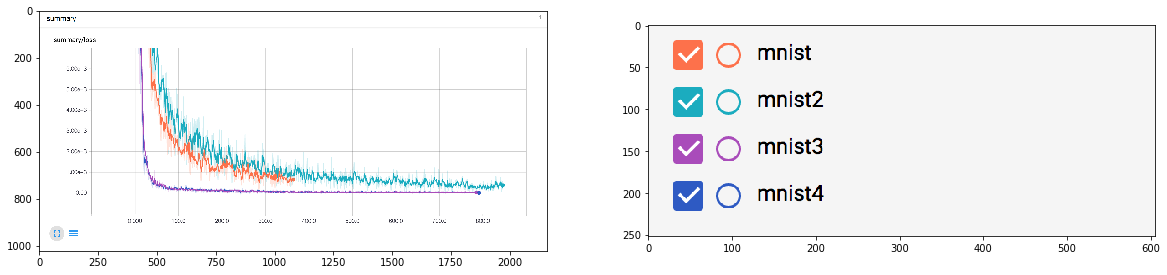

In [151]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


im1 = Image.open('images/img1.png')
im2 = Image.open('images/img2.png')
# im3 = stitchImages(im1, im2)
# im3

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(np.array(im1))

plt.subplot(1, 2, 2)
plt.imshow(im2)
